# Revisão para a Prova

**1) Plote e verifique as informações do dataset Mne SAMPLE**

In [1]:
# 1) Instalação dos pacotes necessários

# Célula 1 — Instalação (executar uma vez)
import sys

# Atualiza pip e instala os pacotes necessários no mesmo ambiente do kernel
!{sys.executable} -m pip install --upgrade pip # Atualiza o pip para garantir que temos a versão mais recente
!{sys.executable} -m pip install mne numpy scipy matplotlib pandas scikit-learn ipykernel jupyterlab # Instala os pacotes necessários para análise de EEG e visualização

In [2]:
# 2) Importações e verificação de versões / info do sistema

# Célula 2 — Importações e verificações
import os
import sys
import platform
import mne
import numpy as np
import scipy
import matplotlib
import pandas as pd
import sklearn

print("Python:", sys.version.splitlines()[0])
print("Plataforma:", platform.platform())
print("mne.__version__:", mne.__version__)
print("numpy:", np.__version__)
print("scipy:", scipy.__version__)
print("matplotlib:", matplotlib.__version__)
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)

# Informações detalhadas do MNE e do sistema
print("\n=== mne sys_info() ===")
print(mne.sys_info())

Python: 3.14.3 (v3.14.3:323c59a5e34, Feb  3 2026, 11:41:37) [Clang 16.0.0 (clang-1600.0.26.6)]
Plataforma: macOS-13.7.8-x86_64-i386-64bit-Mach-O
mne.__version__: 1.11.0
numpy: 2.4.2
scipy: 1.17.0
matplotlib: 3.10.8
pandas: 3.0.1
scikit-learn: 1.8.0

=== mne sys_info() ===
Platform             macOS-13.7.8-x86_64-i386-64bit-Mach-O
Python               3.14.3 (v3.14.3:323c59a5e34, Feb  3 2026, 11:41:37) [Clang 16.0.0 (clang-1600.0.26.6)]
Executable           /usr/local/bin/python3
CPU                  Intel(R) Core(TM) i5-7Y54 CPU @ 1.20GHz
machdep.cpu.family: 6
machdep.cpu.model: 142
machdep.cpu.extmodel: 8
machdep.cpu.extfamily: 0
machdep.cpu.stepping: 9
machdep.cpu.feature_bits: 9221959987971750911
machdep.cpu.leaf7_feature_bits: 43804591 0
machdep.cpu.leaf7_feature_bits_edx: 3154128384
machdep.cpu.extfeature_bits: 1241984796928
machdep.cpu.signature: 526057
machdep.cpu.brand: 0
machdep.cpu.features: FPU VME DE PSE TSC MSR PAE MCE CX8 APIC SEP MTRR PGE MCA CMOV PAT PSE36 CLFSH DS ACPI

In [3]:
# 3) Baixar / obter caminho do sample dataset e listar arquivos importantes

# Célula 3 — Obter (e se necessário baixar) o sample dataset
from pathlib import Path
from mne.datasets import sample

# Este comando retorna o caminho local e baixa se necessário
sample_path = sample.data_path(verbose=True)  # se não houver, fará download automático
sample_path = Path(sample_path)
print("sample_path =", sample_path)

# Caminhos de arquivo frequentemente úteis no dataset sample
raw_fname = sample_path / 'MEG' / 'sample' / 'sample_audvis_raw.fif'
event_fname = sample_path / 'MEG' / 'sample' / 'sample_audvis_raw-eve.fif'
print("raw file exists?", raw_fname.exists(), raw_fname)
print("events file exists?", event_fname.exists(), event_fname)

sample_path = /Users/tiago/mne_data/MNE-sample-data
raw file exists? True /Users/tiago/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif
events file exists? True /Users/tiago/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw-eve.fif


In [4]:
# CÉLULA 4 — Carregar o raw e mostrar informações básicas (VERSÃO SIMPLES)

# Carregar o arquivo
raw = mne.io.read_raw_fif(raw_fname, preload=True)

# Mostrar todas as informações do objeto
raw.info

Opening raw data file /Users/tiago/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

**2) Plote os dados brutos apenas dos seguintes dados:**

* **A) Plote os dados brutos apenas de EEG e EOG**

* **B) Plote os dados brutos apenas de MEG**

In [ ]:
# 2 - A) Plotar apenas EEG + EOG 

# Executar após já ter carregado `raw`
raw.load_data()  # Garantir que os dados estão carregados na memória

# Seleciona somente canais EEG e EOG (sem mudar o objeto original)
raw_eeg_eog = raw.copy().pick_types(eeg=True, eog=True, meg=False)

if len(raw_eeg_eog.ch_names) == 0:
    print("Não há canais EEG/EOG neste dataset.")
else:
    # duration = segundos por janela; n_channels = quantos canais mostrar por página
    raw_eeg_eog.plot(title='EEG + EOG — sinais brutos', duration=10.0, n_channels=20, show=True)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Using qt as 2D backend.


Channels marked as bad:
none
Channels marked as bad:
none
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
['EEG 053']
Channels marked as bad:
['EEG 053']
Channels marked as bad:
['EEG 053']
Channels marked as bad:
['EEG 053']
Channels marked as bad:
['EEG 053']
Channels marked as bad:
['EEG 053']
Channels marked as bad:
['EEG 053']


In [6]:
# 2 - B) Plotar apenas MEG

# Executar após já ter carregado `raw`
raw.load_data()  # Garantir que os dados estão carregados na memória

# Seleciona somente canais MEG (mag + grad)
raw_meg = raw.copy().pick_types(meg=True, eeg=False)

if len(raw_meg.ch_names) == 0:
    print("Não há canais MEG neste dataset.")
else:
    # Ajuste duration/n_channels conforme sua tela / memória
    raw_meg.plot(title='MEG — sinais brutos', duration=10.0, n_channels=40, show=True)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


**3) Coloque nos dados de EEG e EOG a montagem no sistema 10-20**

In [7]:
# CRIAR UM DATASET SIMULADO COM 19 CANAIS (10-20) E 10 SEGUNDOS DE DURAÇÃO

import numpy as np
import mne

# 1) Lista 10-20 (19 canais)

ch_19 = [
    "Fp1", "Fp2",
    "F7", "F3", "Fz", "F4", "F8",
    "T7", "C3", "Cz", "C4", "T8",
    "P7", "P3", "Pz", "P4", "P8",
    "O1", "O2"
]

sfreq = 250
duration = 10
n_samples = sfreq * duration

# 2) Criar dados simulados

data = np.random.randn(len(ch_19), n_samples)

info = mne.create_info(
    ch_names=ch_19,
    sfreq=sfreq,
    ch_types="eeg"
)

raw_19 = mne.io.RawArray(data, info)

print("Dataset com 19 canais criado.")
print(raw_19)

Creating RawArray with float64 data, n_channels=19, n_times=2500
    Range : 0 ... 2499 =      0.000 ...     9.996 secs
Ready.
Dataset com 19 canais criado.
<RawArray | 19 x 2500 (10.0 s), ~389 KiB, data loaded>


Montagem aplicada:
<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 19 channels>


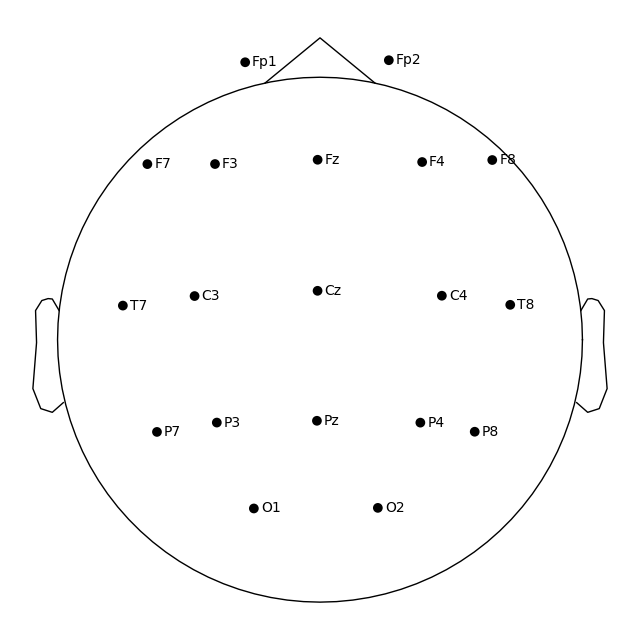

<Figure size 640x640 with 1 Axes>

In [8]:
montage = mne.channels.make_standard_montage("standard_1020")

raw_19.set_montage(montage)

print("Montagem aplicada:")
print(raw_19.get_montage())

raw_19.plot_sensors(kind="topomap",show_names=True)

**4) Aplique aos dados brutos de EEG e EOG 2 filtros e posteriormente plote os gráficos após cada um dos filtros e observe a diferença entre o EEG bruto e o EEG filtrado:**

* **A) Band Pass de 0.1 a 40 Hz A**

* **B) Aplique o filtro ICA**

* **C) Plote  as topografias de 19 componentes ICA para inspeção visual**

Opening raw data file /Users/tiago/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 19821 samples (33.001 s)

Fitting ICA to data using 59 channels (please be patient, this may take a while)

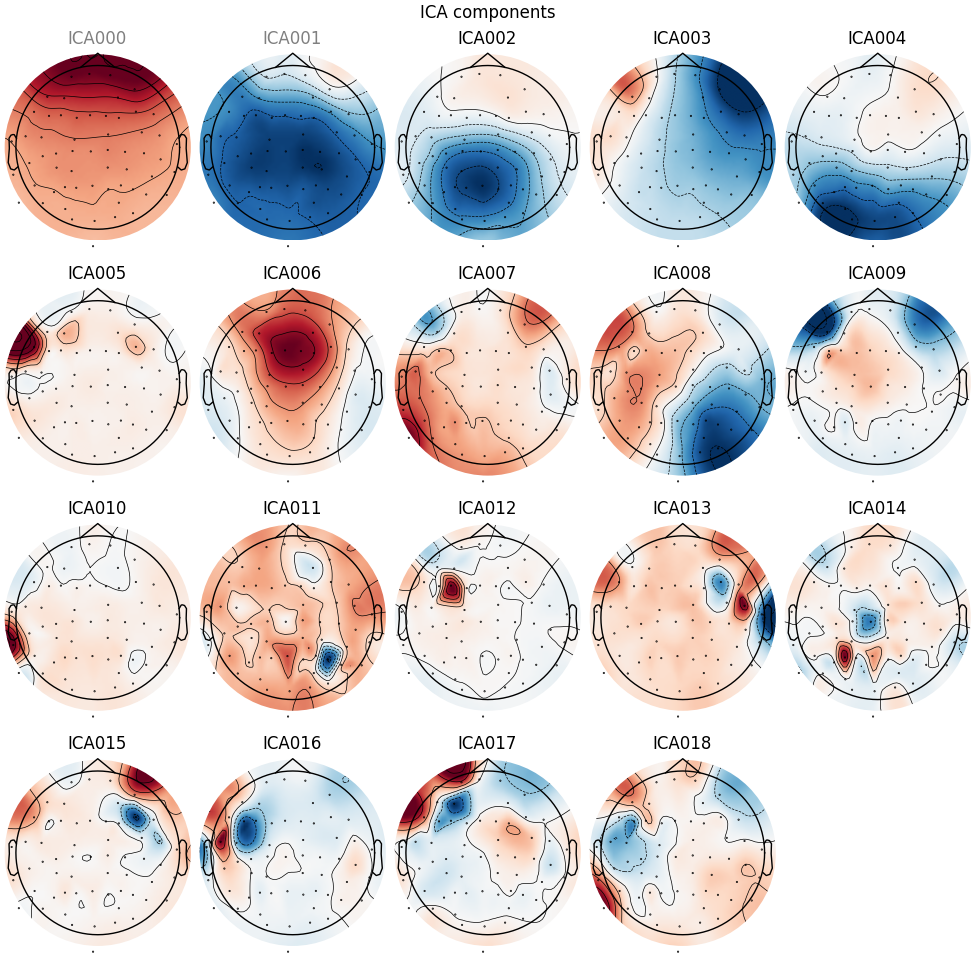

<MNEFigure size 975x967 with 19 Axes>

In [15]:
import mne

# 1) Carregar dataset sample
path = mne.datasets.sample.data_path()

raw_file = path / "MEG" / "sample" / "sample_audvis_raw.fif"

raw = mne.io.read_raw_fif(raw_file, preload=True)

# Selecionar apenas EEG e EOG
raw.pick(["eeg", "eog"])

# Plot bruto
raw.plot(title="EEG Bruto")

# 2) Filtro 0.1–40 Hz
raw_filtro = raw.copy()
raw_filtro.filter(l_freq=0.1, h_freq=40.)
raw_filtro.plot(title="EEG Filtrado 0.1–40 Hz")

# 3) ICA
ica = mne.preprocessing.ICA(n_components=19, random_state=97, max_iter="auto")
ica.fit(raw_filtro)

eog_inds, _ = ica.find_bads_eog(raw_filtro)
ica.exclude = eog_inds

raw_ica = raw_filtro.copy()
ica.apply(raw_ica)

raw_ica.plot(title="EEG após ICA")

# 4) Topografias ICA
ica.plot_components(picks=range(19))

**5) PLOTE OS SEGUINTES GRÁFICOS**

* **A) Gráfico de PSD de todos os canais**

* **B) Gráfico de Potência média por banda**

* **D) Gráfico de Frequência por Tempo**

In [16]:
import mne
import numpy as np
import matplotlib.pyplot as plt

# Carregar dataset
path = mne.datasets.sample.data_path()
raw_file = path / "MEG" / "sample" / "sample_audvis_raw.fif"

raw = mne.io.read_raw_fif(raw_file, preload=True)

# Selecionar apenas EEG
raw.pick("eeg")

# Aplicar filtro leve para análise espectral
raw.filter(0.1, 40.)

Opening raw data file /Users/tiago/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 19821 samples (33.001 s)



<Raw | sample_audvis_raw.fif, 60 x 166800 (277.7 s), ~79.3 MiB, data loaded>

Effective window size : 3.410 (s)
Plotting power spectral density (dB=True).


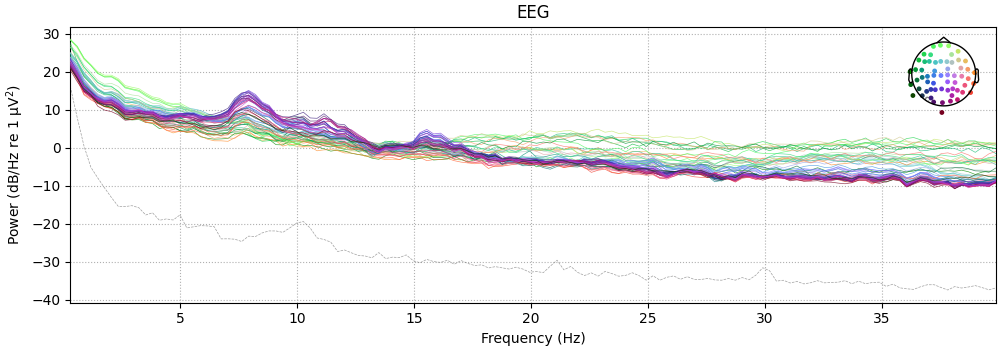

<MNELineFigure size 1000x350 with 2 Axes>

In [ ]:
psd = raw.compute_psd(fmin=0.1, fmax=40) # calcular PSD usando Welch

psd.plot()

Effective window size : 3.410 (s)


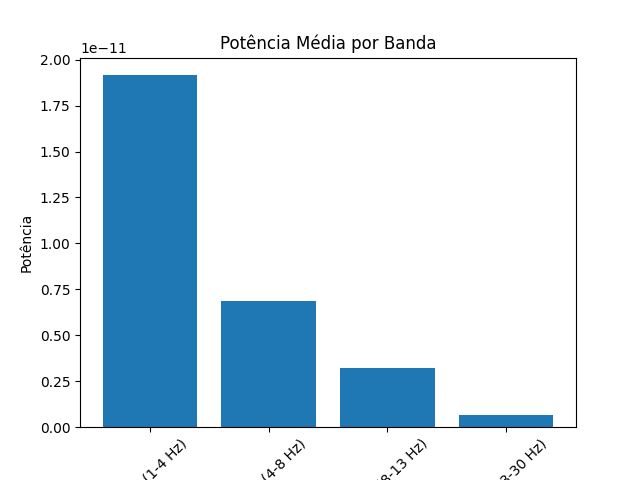

In [19]:
# Definir bandas clássicas
bandas = {
    "Delta (1-4 Hz)": (1, 4),
    "Theta (4-8 Hz)": (4, 8),
    "Alpha (8-13 Hz)": (8, 13),
    "Beta (13-30 Hz)": (13, 30)
}

psd = raw.compute_psd(fmin=1, fmax=30)
dados = psd.get_data()
freqs = psd.freqs

potencias_medias = []

for banda in bandas.values():
    fmin, fmax = banda
    idx = np.logical_and(freqs >= fmin, freqs <= fmax)
    potencias_medias.append(dados[:, idx].mean())

plt.bar(bandas.keys(), potencias_medias)
plt.xticks(rotation=45)
plt.title("Potência Média por Banda")
plt.ylabel("Potência")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Selecionar um canal
data, times = raw.get_data(picks=0, return_times=True)
data = data.flatten()

fs = raw.info['sfreq']

# Calcular espectrograma
frequencies, times, Sxx = signal.spectrogram(data, fs)

plt.pcolormesh(times, frequencies, Sxx)
plt.ylabel('Frequência (Hz)')
plt.xlabel('Tempo (s)')
plt.title('Frequência por Tempo')
plt.ylim(0, 40)
plt.show()

**6) Plote os seguintes mapas topográficos:**

* **A) Mapa topografico geral de PSD**

* **B) Mapa topografico de PSD Delta**

* **C) Mapa topografico de PSD Theta**

* **D) Mapa topografico de PSD Alfa**

* **E) Mapa topografico de PSD Beta**

* **F) Mapa topgrafico de PSD Gama**

Extracting EDF parameters from EDF_EEG.edf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 197375  =      0.000 ...   770.996 secs...


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 8449 samples (33.004 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Effective window size : 8.000 (s)


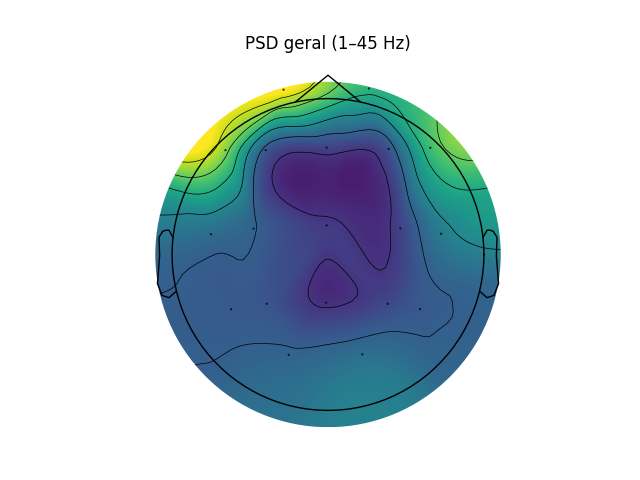

In [19]:
import mne
import matplotlib.pyplot as plt
import numpy as np

# 1) Carregar
raw = mne.io.read_raw_edf("EDF_EEG.edf", preload=True)

# 2) Filtrar
raw.filter(l_freq=0.1, h_freq=40.)

# 3) Manter apenas EEG
raw.pick_types(eeg=True)

# 4) Aplicar montagem padrão (necessário para topomap)
montage = mne.channels.make_standard_montage("standard_1020")
raw.set_montage(montage, on_missing='ignore')

# 5) CALCULAR O PSD (isso faltava)
psd = raw.compute_psd(fmin=1, fmax=45)

# 6) Extrair dados e frequências
psd_data = psd.get_data()
freqs = psd.freqs

# 7) Média geral
psd_mean = psd_data.mean(axis=1)

fig, ax = plt.subplots()
mne.viz.plot_topomap(psd_mean, raw.info, axes=ax, cmap='viridis', show=False)
ax.set_title("PSD geral (1–45 Hz)")
plt.show()


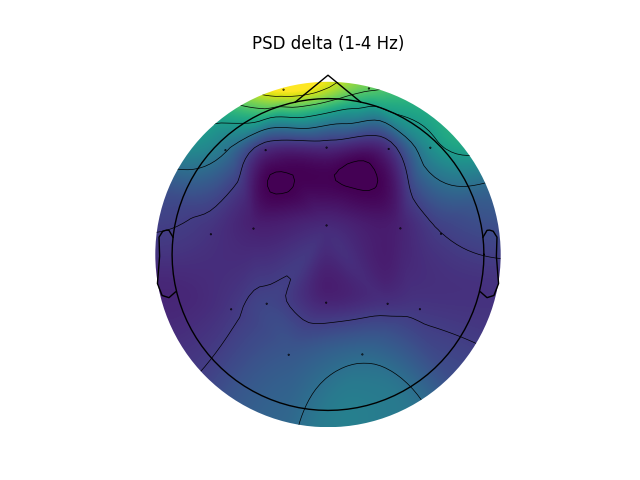

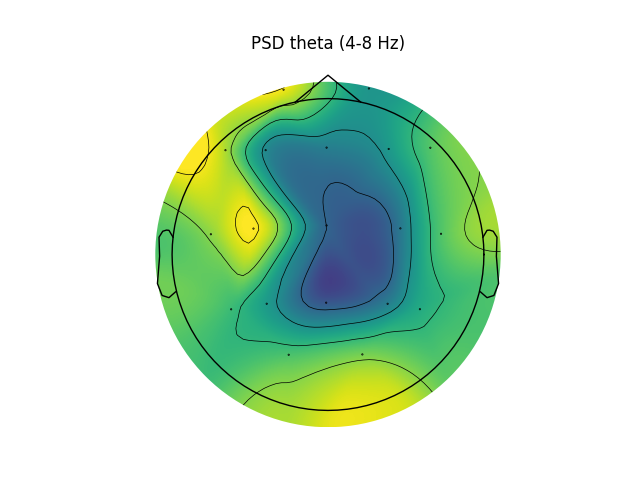

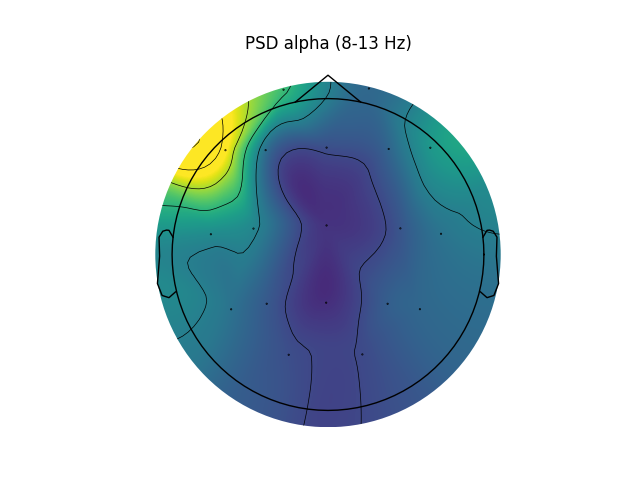

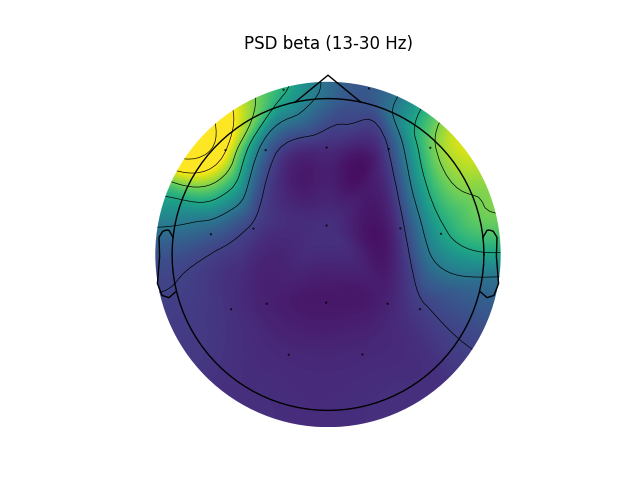

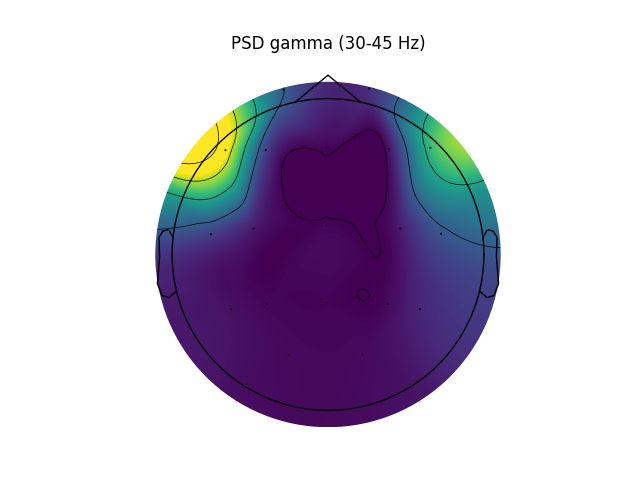

In [20]:
bands = {
    'delta': (1, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma': (30, 45)
}

for band_name, (fmin, fmax) in bands.items():

    idx_band = (freqs >= fmin) & (freqs <= fmax)
    psd_band = psd_data[:, idx_band].mean(axis=1)

    fig, ax = plt.subplots()
    mne.viz.plot_topomap(psd_band, raw.info, axes=ax, cmap='viridis', show=False)
    ax.set_title(f"PSD {band_name} ({fmin}-{fmax} Hz)")
    plt.show()

**7) Utilizando o MNE sample dataset (sample_audvis_raw.fif) e considerando apenas os canais de EEG, realize uma análise de ERP para estímulos auditivos. Carregue os dados, identifique os eventos, crie epochs no intervalo de -200 ms a 500 ms com correção de baseline, calcule a média (ERP) e plote o resultado para todos os canais. Em seguida, selecione um canal central (por exemplo, EEG 021), plote o ERP apenas para esse canal e identifique aproximadamente a latência e a polaridade do componente N100.**

In [9]:
# PASSO 1: Selecionando penas canais de EEG da minha base de dados
raw_eeg = raw.copy().pick('eeg') 
# Estou reaproveitando o raw da equestão anterior, mas poderia ser o raw original. O importante é usar pick para selecionar apenas os canais de EEG
# Se fosse fazer do 0, seria:
# raw_eeg = mne.io.read_raw_fif(raw_fname, preload=True).pick('eeg')

In [10]:
# PASSO 2: CRIANDO EPOCHS
events_eeg = mne.read_events(event_fname) # Carrega os eventos do arquivo de eventos
raw_eeg.plot(events = events_eeg)# Imprime os eventos para visualização, mas perceba que eles não estão categorizados, ou seja, não tem rótulos de qual evento é qual. Eles aparecem como retângulos vermelhos, mas sem identificação do tipo de evento

# Para o sample dataset, os IDs (identificadores de cada evento) padrão são:
event_id = {
    'auditory/left': 1,
    'auditory/right': 2,
    'visual/left': 3,
    'visual/right': 4,
    'smiley': 5,
    'button': 32
}

# Agora que temos os eventos e os IDs, podemos criar as epochs. Elas são usadas para calcular os ERPs posteriormente
epochs_eeg = mne.Epochs(
    raw = raw_eeg,
    events = events_eeg,
    event_id = event_id,
    tmin=-0.2,  # início da época (200ms antes do estímulo)
    tmax=0.5,   # fim da época (500ms após o estímulo)
    baseline=(-0.2, 0),  # período de baseline (de -200ms a 0ms)
    preload=True,
)

epochs_eeg.plot() # Plota as epochs para visualização, elas são separadas por linhas tracejadas

Not setting metadata
320 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 320 events and 421 original time points ...
0 bad epochs dropped


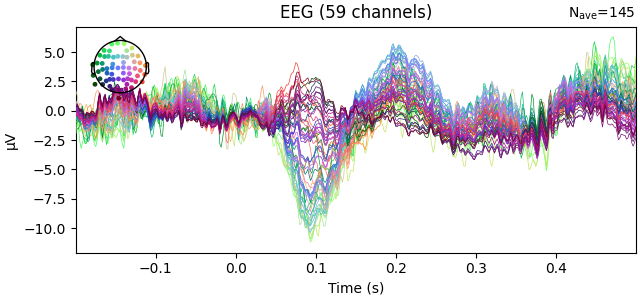

<Figure size 640x300 with 2 Axes>

In [11]:
# PARTE 3: CALCULAR ERPs (média das epochs) e PLOTAR PARA TODOS OS CANAIS
evoked_auditory = epochs_eeg['auditory'].average() # Pego tanto o auditory/left quanto o auditory/right, pois ambos estão categorizados como 'auditory' no event_id
evoked_auditory.plot() # ou evoked_auditory.plot_joint() para uma visualização mais detalhada

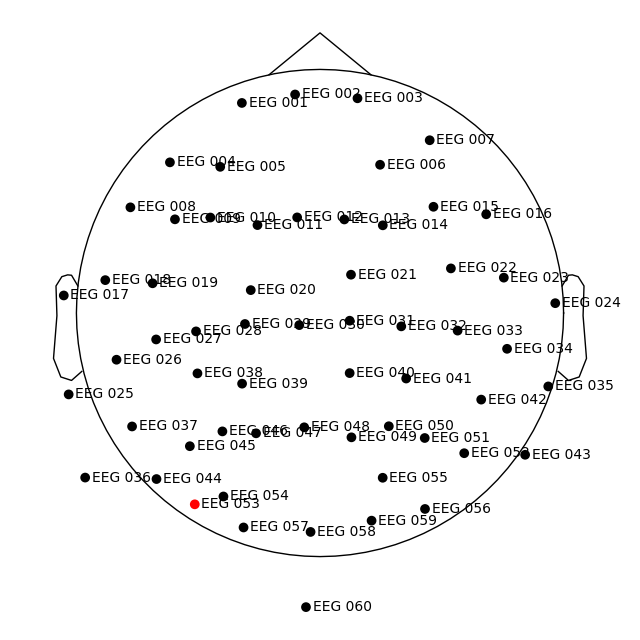

Need more than one channel to make topography for eeg. Disabling interactivity.


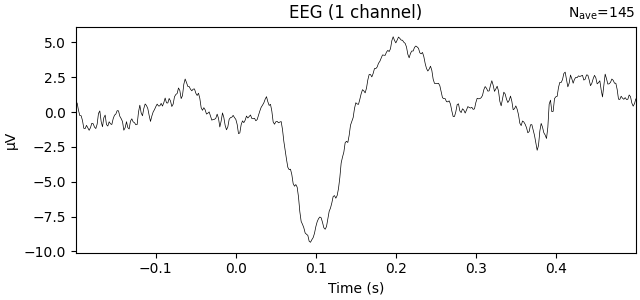

<Figure size 640x300 with 1 Axes>

In [12]:
# PARTE 4: PLOTAR EVOKED PARA UM CANAL CENTRAL

# Visualize a montagem dos eletrodos e escolha um canal central (literalmente no centro do couro cabeludo)
raw_eeg.plot_sensors(show_names=True)

# Selecionar o canal
canal = 'EEG 021' 

# Plot simples do canal
evoked_auditory.plot(picks=canal)

In [13]:
# PARTE 5: INDENTIFICAR LATÊNCIA E POLARIDADE DO N100


# O N100 é a "onda elétrica" (deflexão NEGATIVA) que o cérebro produz entre 80-120ms milissegundos após o estímulo (depois de ouvir/ver algo), mostrando que ele percebeu que aconteceu alguma coisa
# > N   = 'Negativa' (é uma onda que vai pra baixo)
# > 100 = Acontece em ~100 milissegundos

# O método get_peak do MNE é uma forma prática de encontrar a latência e amplitude do pico
n100_info = evoked_auditory.get_peak(ch_type='eeg', 
                                      tmin=0.08, # 80ms
                                      tmax=0.12, # 120ms
                                      mode='neg',  # buscar pico negativo
                                      )

# ⚠️ IMPORTANTE: get_peak retorna uma TUPLA com 3 elementos:
# n100_info[0] = NOME DO CANAL onde o N100 é MAIS FORTE
# n100_info[1] = LATÊNCIA do pico (em segundos) <-- Preciso desse
# n100_info[2] = AMPLITUDE do pico (em Volts)

print(f"\nResultados")
print(f"   Polaridade: Negativa (característica do N100)")
print(f"   Latência: {n100_info[1] * 1000:.1f} ms")


Resultados
   Polaridade: Negativa (característica do N100)
   Latência: 93.2 ms
